# ML-I  Lab 1: Visualization and Data Preprocessing 
---
#### Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo

### HOMICIDE 
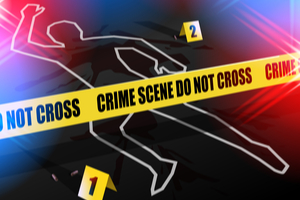

## CONTENS 

1. Business Understanding
2. Data Understanding
    <ul>
    <li><a href="#Data-Description">Data Description</a></li>
    <li><a href="#Verify-data-quality">Verify data quality</a></li>
    <li><a href="#Statistics">Statistics</a></li>
    <li><a href="#EDA">EDA</a></li>
    <li><a href="#Visualization">Visualization</a></li>
    <li><a href="#Discoveries">Discoveries</a></li>
    <li><a href="#New-Feature-Creation">New Feature Creation</a></li>
    <li><a href="#Exceptional-Work">Exceptional Work</a></li>
    </ul> 



### Business Understanding:


_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._
https://www.law.cornell.edu/wex/murder

We have been hearing many news about homicide  lately in the mids of already existing Covid-19 pandemic. Violent crime and homicide have been rising saliently across the US. The number of homicide has almost increase by double digits in many bigger cities such has Chicago, New York, Philadelphia just to name few. To have better understanding about criminal and victim profile , to visualize some interesting relation and to make prediction on if the kind of homicide has been solved or unsolved we decided to pick homicide as a topic for our project. 

Just to define simply, homicide is the killing of one person by another. Homicide might or might not be illegal. Legal homicide could be such as person killing intruders without committing crime or solders killing enemies in battle, while the illegal homicide is an intentional murder of one individual by another or if someone involves in the activities. Our data set has two types of crime: Murder or Manslaughter and Manslaughter by Negligence. Murder occurs when one human being unlawfully kills another human being. Murder are broken into degrees, First degree which is willful, deliberate and premeditated murder. Second-degree murder- which do not carry the death penalty. Manslaughter is the act of killing another human being in a way that is less accountable than murder. In other words manslaughter is not as sever crime as murder. Manslaughter is categorized into voluntary and involuntary manslaughter. Voluntary manslaughter is defined as killing of another human being under extreme provocation which typically does not require an intent to kill. For example an individual who kills another individual in self-defense may be charged with voluntary manslaughter if he was the original attacker in the situation. 
While involuntary manslaughter is defined as death of another human being due to act of negligence or recklessness of the defendant.For example, a person who drives under the influence of alcohol may hit and kill a pedestrian, although killing him was not his intention. 

United States does a poor job in tracking and accounting for its unsolved homicides. According to Scripps Howard News Service study of the FBI’s Uniform Crime Report, across U.S. nearly 185,000 cases of homicides and non-negligent manslaughter were unsolved from 1980 to 2008. The rate at which police clear homicides through arrest has declines year over year. About 4 of every 10 homicides go unsolved each year.As per FBI Uniform Crime Report, currently on average, 40 percent of homicides are unsolved. These rising number of unsolved homicides also known as cold case is a major problem to our society as well as law enforcement as its leaving a growing number of killers out on the streets, undermining the safety in urban neighborhoods and also crumbling the confidence in the criminal justice system. 

No one knows all the names of the murder victims because no law enforcement agency in America is assigned to monitor failed homicide investigations by local police departments. Even the official national statistics on murder are actually estimates and projections based upon incomplete reports by police departments that voluntarily choose (or refuse) to participate in federal crime reporting programs.

keeping all these in mind our primary key in this project is to help classify the cases solved or unsolved based on the data we have. 

Our dataset come from the Murder Accountability Project which is a nonprofit group organized in 2015 to educate American on the important of accurately accounting for unsolved homicides. Their projects board of directory is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide.










### <font color='#3498DB '>These are the libraries that we will be using to complete our analysis:</font> 

In [ ]:
import numpy as np
import pandas as pd 
import os 
import urllib
#import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import pyplot as plt


### <font color='#3498DB '>Importing Dataset</font> 

In [1195]:
df=pd.read_csv('/Users/ghimirek/Desktop/ML_database.csv') 

/Users/ghimirek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1196]:
pd.set_option('display.max_columns', 28) # displays all columns 

In [1204]:
df.tail(100) 

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638354,638355,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,November,5,Murder or Manslaughter,Yes,Male,46,Black,Unknown,Male,48,Black,Unknown,Acquaintance,Knife,0,0,FBI
638355,638356,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,1,Murder or Manslaughter,Yes,Male,17,Black,Unknown,Male,17,Black,Unknown,Stranger,Handgun,0,0,FBI
638356,638357,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,2,Murder or Manslaughter,No,Male,19,Black,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,1,1,FBI
638357,638358,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,3,Murder or Manslaughter,Yes,Female,33,Black,Unknown,Male,42,Black,Unknown,Wife,Handgun,0,0,FBI
638358,638359,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,4,Murder or Manslaughter,Yes,Female,52,Black,Unknown,Female,51,Black,Unknown,Sister,Blunt Object,0,0,FBI
638359,638360,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,5,Murder or Manslaughter,Yes,Female,23,Black,Unknown,Female,20,Black,Unknown,Acquaintance,Handgun,0,2,FBI
638360,638361,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,6,Murder or Manslaughter,Yes,Male,17,Black,Unknown,Male,17,Black,Unknown,Stranger,Handgun,0,0,FBI
638361,638362,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,7,Murder or Manslaughter,Yes,Male,24,Black,Unknown,Male,42,Black,Unknown,Stranger,Handgun,0,0,FBI
638362,638363,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,8,Murder or Manslaughter,Yes,Female,24,Black,Unknown,Male,30,Black,Unknown,Girlfriend,Firearm,0,0,FBI
638363,638364,WIMPD00,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,December,9,Murder or Manslaughter,No,Male,48,Black,Unknown,Unknown,0,Black,Unknown,Unknown,Firearm,0,0,FBI


Drop noisy features

size of dataset 

In [1198]:
df.shape

(638454, 24)

### Data Description
_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file_.

Our dataset consist of 638454 instances and 23 attributes (proerty of data)
23 attributes are: 

    1. Agency Code: The FBI has 56 field offices.Within these field offices are a total of about 380 resident agencies located in smaller cities and towns.
    2.Agency Name: Name of agency located in smaller cities and towns. 
    3. Agency Type: Municipal Police, County Police, State Police, Sheriff,
       Special Police, Regional Police and Tribal Police
    4. City: Represents the major cities where the crime had occurred.
    5. State: Represent all the states of United States
    6. Year: Represents the crime history from 1980 to 2014
    7. Month: Represents the 12 months of year of entire time. 
    8. Incident: Represents the number of incidents of crimes that is recorded by agency.
    9. Crime Type: There are two types of crime reported in this dataset: Manslaughter by Negligence and Murder or Manslaughter
    10. Crime Solved: Represents number of crime that were solved 'YES' and not solved 'NO'.
    11. Victim Sex: Represents the gender of victim which were Male, Female and Unknown. 
    12. Victim Age: Represents the age of the victims. 
    13. Victim Race: Descriptions of victims race which were White, Black,Native American/ Alaska Native, Asian/Pacific Islander and unknown.
    14. Victim Ethnicity: Describe the ethnic group of victim, Hispanic, non-Hispanic and unknown.
    15. Perpetrator Sex: Gender of a person who carries out a harmful, illegal, or immoral act, Male, Female and Unknown 
    16. Perpetrator Age: Represents age of a person who carries out a harmful, illegal, or immoral act
    17. Perpetrator Race: Represents race of a person who carries out a harmful, illegal, or immoral act which are White, Black,Native American/ Alaska Native, Asian/Pacific Islander and unknown.
    18. Perpetrator Ethnicity: Represents ethnic group of a person who carries out a harmful, illegal, or immoral act which are Hispanic, non-Hispanic and unknown.
    19. Relationship: Not sure about this???
    20. Weapon: Type of weapons that were used to commit crime which includes: Blunt Object, Strangulation, Unknown, Rifle, Knife,Firearm, Shotgun, Fall, Handgun, Drowning, Suffocation, Explosives, Fire, Drugs, Gun, Poison
    21. Victim Count: Number of people who were the victim of crime 
    22. Perpetrator Count: Number of people who where involved in criminal activities.
    23. Record Source: Data has two recording source, The Federal Bureau of Investigation (FBI) and Freedom of Information Act (FOIA) 
    24. Record ID: This is just record number and we are going to exclude this. 
    
 
### Attributes Type:
        A. Nominal Attributes: The attribute takes on names or labels that cannot be ordered.
                1. Agency Name
                2. Agency Type
                3. City
                4. State
                5. Month
                6. Crime Type
                7. Victim Race
                8.Victim Ethnicity
                9. Perpetrator Race
                10. Perpetrator Ethnicity
                11. Relationship
                12. Weapon
                13. Record Source
                14. Victim Sex
                15. Perpetrator Sex
         B. Ordinal Features: 
                 1.Year 
                 2.Agency Code
         C. Discrete:the integer features takes on a numeric value in which there are a countable number of values   
                 1. Incident 
                 2. Victim Age
                 3. Perpetrator Sex
                 4. Victim Count
                 5.Perpetrator Count
         D. Binary Features:
                 1. Crime Solved

                

#### Below is the confirmation of data type. Categorical data represented as object and quantitative attributes represented as int64 

In [1205]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [1206]:
# The code below displays all the categorical features that are in the dataset
cat_featuress = df.select_dtypes(include='object')
cat_featuress.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Month',
       'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Record Source'],
      dtype='object')

These are all the categorical features that are in the dataset.

In [1207]:
quantative_features = df.select_dtypes(include=['int64','float64'])

In [1208]:
quantative_features.columns

Index(['Record ID', 'Year', 'Incident', 'Victim Age', 'Victim Count',
       'Perpetrator Count'],
      dtype='object')

These are the quantitative features that are included in the dataset.

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [1213]:
col_name = df.columns 

In [1214]:
# remove the white space between the words of features name 
col_space=[]
for k in col_name:
    g = k.replace(' ','_')
    col_space.append(g)
print(col_space) 


['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime_Type', 'Crime_Solved', 'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity', 'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race', 'Perpetrator_Ethnicity', 'Relationship', 'Weapon', 'Victim_Count', 'Perpetrator_Count', 'Record_Source']


In [1215]:
df.columns = col_space # Replacing the old column name with new columns name without white space.

In [1216]:
df.columns

Index(['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime_Type', 'Crime_Solved',
       'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity',
       'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race',
       'Perpetrator_Ethnicity', 'Relationship', 'Weapon', 'Victim_Count',
       'Perpetrator_Count', 'Record_Source'],
      dtype='object')

We noticed the white space between the words of many features. Therefore we decided to replace those white
spaces with '_' to better manipulate the features.

Top fives instances of our dataset with white space removed

In [1566]:
df.head()

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [1222]:
# delete Record_ID features as it provides no use for our analysis. 
if 'Record_ID' in df:
    del df['Record_ID']

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Dataset with no Record_ID

### Verify data quality
_Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific_.

Dataset has many unknown values. There are some missing value in the form of empty string ' '. 
Missing values are <5% therefore we are going to replace the missing values with Median for all discrete features.
In dataset, Perpetrator Age has empty string values ' '. We are replacing it with Median because median is
not affected by outliers.

Our dataset has lots of duplicate. These duplicates are not mistake because there are only handfull of 
agency that is keeping records of all the murder incidents. 

Total number of duplicate instances in dataset are: 626451





Checking for duplicate instances in dataset

In [1179]:
# check if there are any duplicate in dataset
# create function that checks duplicate
# take parameter name p_Agency Code
# if duplicate return true else return false
def checkDuplicate (len_instances):
    '''check if give list contains any duplicates'''
    if len_instances == set_intances:
        return False
    else:
        return True

In [1180]:
# lets check if duplicate instances are present
dup_result = checkDuplicate (len_instances)
if dup_result:
    print('YES,duplicate instances present')
else:
    print('NO, duplicate instances are present')

YES,duplicate instances present


In [ ]:
# How many dublicate instances are present in dataset?

In [1184]:
len_instances = len(df.Agency_Code)

In [1224]:
set_intances=len(set(df.Agency_Code)

SyntaxError: unexpected EOF while parsing (<ipython-input-1224-ebdc4cc96e12>, line 1)

In [1225]:
dif = len_instances-set_intances

In [1226]:
print('Total number of duplicate instances in dataset are:',dif)

Total number of duplicate instances in dataset are: 626451


### Statistics
Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [1229]:
df.Victim_Age.min(),df.Victim_Age.max()

(0, 998)

In [ ]:
#df.Perpetrator_Age.max(),df.Perpetrator_Age.min()  

In [1232]:
# convert object variable 'Perpetratrator age' into int
df.Perpetrator_Age=pd.to_numeric(df.Perpetrator_Age) 

ValueError: Unable to parse string " " at position 634666

In [1236]:
df[df.Perpetrator_Age ==' '].index # checking for the empty string in Perpetrator_Age columns

Int64Index([634666], dtype='int64')

In [1259]:
df[634666:634670] # Finding empty string 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,,Unknown,Unknown,Unknown,Handgun,0,0,FBI
634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,105,Murder or Manslaughter,Yes,Male,37,White,Hispanic,Male,0,Unknown,Unknown,Stranger,Knife,0,0,FBI
634668,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,106,Murder or Manslaughter,Yes,Male,37,Black,Not Hispanic,Male,0,Unknown,Unknown,Unknown,Handgun,0,2,FBI
634669,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,July,101,Murder or Manslaughter,Yes,Male,57,Black,Not Hispanic,Male,26,Black,Not Hispanic,Unknown,Firearm,0,0,FBI


In [1246]:
# Lets first replce an empty string with just -1 then later replace with median

In [1260]:
df.replace(to_replace=' ',value='-1',inplace=True) 

In [1261]:
df[634666:634670] # Finding replaced string  

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,-1,Unknown,Unknown,Unknown,Handgun,0,0,FBI
634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,105,Murder or Manslaughter,Yes,Male,37,White,Hispanic,Male,0,Unknown,Unknown,Stranger,Knife,0,0,FBI
634668,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,106,Murder or Manslaughter,Yes,Male,37,Black,Not Hispanic,Male,0,Unknown,Unknown,Unknown,Handgun,0,2,FBI
634669,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,July,101,Murder or Manslaughter,Yes,Male,57,Black,Not Hispanic,Male,26,Black,Not Hispanic,Unknown,Firearm,0,0,FBI


In [1263]:
#  converting the Perpetrator_Age into numeric
df.Perpetrator_Age=pd.to_numeric(df.Perpetrator_Age)  


In [1264]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 23 columns):
Agency_Code              638454 non-null object
Agency_Name              638454 non-null object
Agency_Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime_Type               638454 non-null object
Crime_Solved             638454 non-null object
Victim_Sex               638454 non-null object
Victim_Age               638454 non-null int64
Victim_Race              638454 non-null object
Victim_Ethnicity         638454 non-null object
Perpetrator_Sex          638454 non-null object
Perpetrator_Age          638454 non-null int64
Perpetrator_Race         638454 non-null object
Perpetrator_Ethnicity    638454 non-null object
Relationship             6384

As you can see that the Perpetrator_Age has been converted into numeric

In [1275]:
# replace all the -1  values with nan  to later replace with median 
df = df.replace(to_replace=-1,value=np.nan)


In [1276]:
df.isnull().values.any()  

True

In [1277]:
df.isnull().sum() 

Agency_Code              0
Agency_Name              0
Agency_Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime_Type               0
Crime_Solved             0
Victim_Sex               0
Victim_Age               0
Victim_Race              0
Victim_Ethnicity         0
Perpetrator_Sex          0
Perpetrator_Age          1
Perpetrator_Race         0
Perpetrator_Ethnicity    0
Relationship             0
Weapon                   0
Victim_Count             0
Perpetrator_Count        0
Record_Source            0
dtype: int64

In [1281]:
# check which col has any nan values 
df.loc[df.isna().any(axis=1)] 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,NaN,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [ ]:
#  #what is the min and max age of Perpetrator?
# print('Max age of Perpetrator:',df_imputed['Perpetrator Age'].max())
# print('Min age of Perpetrator:',df_imputed['Perpetrator Age'].min())

In [1278]:
# Replace the Perpetrator Age with median Perpetrator Age value


In [1453]:
df.median() 

Year                 1995.0
Incident                2.0
Victim_Age             30.0
Perpetrator_Age        21.0
Victim_Count            0.0
Perpetrator_Count       0.0
dtype: float64

In [1454]:
# Separating all the categorical variables 
df_cat_features = df.select_dtypes(include='object')
df_cat_features.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Month,Crime_Type,Crime_Solved,Victim_Sex,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Acquaintance,Strangulation,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,FBI


In [1455]:
df_quantative_features = df.select_dtypes(include=['int64','float64']) 

In [1456]:
df[634666:634670]  # has NaN 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,NaN,Unknown,Unknown,Unknown,Handgun,0,0,FBI
634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,105,Murder or Manslaughter,Yes,Male,37,White,Hispanic,Male,0.0,Unknown,Unknown,Stranger,Knife,0,0,FBI
634668,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,106,Murder or Manslaughter,Yes,Male,37,Black,Not Hispanic,Male,0.0,Unknown,Unknown,Unknown,Handgun,0,2,FBI
634669,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,July,101,Murder or Manslaughter,Yes,Male,57,Black,Not Hispanic,Male,26.0,Black,Not Hispanic,Unknown,Firearm,0,0,FBI


In [1457]:
# fill missing value with median 
df_imputed = df.fillna(value=df.median())

In [1458]:
df_imputed[634666:634670] # changed to median 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
634666,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,21.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,105,Murder or Manslaughter,Yes,Male,37,White,Hispanic,Male,0.0,Unknown,Unknown,Stranger,Knife,0,0,FBI
634668,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,106,Murder or Manslaughter,Yes,Male,37,Black,Not Hispanic,Male,0.0,Unknown,Unknown,Unknown,Handgun,0,2,FBI
634669,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,July,101,Murder or Manslaughter,Yes,Male,57,Black,Not Hispanic,Male,26.0,Black,Not Hispanic,Unknown,Firearm,0,0,FBI


In [1294]:
 df_int_features = ['Year', 'Incident', 'Victim_Age', 'Perpetrator_Age', 'Victim_Count',
       'Perpetrator_Count'] 

In [1379]:
df_cat_features.describe() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Month,Crime_Type,Crime_Solved,Victim_Sex,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Record_Source
count,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,12003,9216,7,1782,51,12,2,2,3,5,3,3,5,3,28,16,2
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,Unknown,Male,White,Unknown,Unknown,Handgun,FBI
freq,38416,38416,493026,44511,99783,58696,629338,448172,494125,317422,368303,399541,218243,446410,273013,317484,616647


Description of categorical features 

In [1452]:
df_imputed.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source,Perpetrator_Age_range
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,Age(0-20)
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Age(31-45)
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,NaN
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Age(31-45)
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,NaN


In [1409]:
df_int_imputed.describe()

,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
count,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,20.322698,0.123334,0.185224
std,9.927693,92.149821,41.628306,17.886828,0.537733,0.585496
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


<font color='#3498DB'><b>Q. How many number of people were victim of crime ?</b></font> 

In [1411]:
# total number of victim count
print('Total number of victims=',df_imputed.Victim_Count.sum() )

Total number of victims= 78743


In [1366]:
#Age of Victim indicates the age or age range of an individual (person) 
#victim in an incident when the crime occurred.
#Valid Data Values
#1 – 98= Years Old
#0 = Unknown
# above 98 invalid data value

In [1410]:
df_imputed.Victim_Age.max()

998

In [1412]:
# Victim age > 100 ???
df_int_imputed[df_imputed.Victim_Age > 98 ].shape  
# total number of instances with Victim Age greater than 98: 10255

(10255, 6)

In [1413]:
df_imputed[df_imputed.Perpetrator_Age>98].shape 
# Total number of instances with Perpetrator Age greater than 98 are:90 

(90, 23)

In [1414]:
# find all the perpetrator with age zero 
df_imputed[df_imputed.Perpetrator_Age==0].shape
# Total number of instances with Perpetrator Age equal to 0 are: 216327


(216327, 23)

In [1415]:
# Percent of Perpetrator_Age that is equal to 0
216327 /df.Perpetrator_Age.count() *100 

33.88299530270827

In [1560]:
df_imputed.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### Visualization

_Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate_.

In [1565]:
df.head(2)

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI


In [1561]:
# which year has the highest number of victim Count?
df2 = df.groupby(by=['Year'])['Victim_Count','Perpetrator_Count'].sum().reset_index() 

In [1562]:
df2.head(2)

,Year,Victim_Count,Perpetrator_Count
0,1980,2410,4237
1,1981,2118,2823


In [1563]:
vp= df2

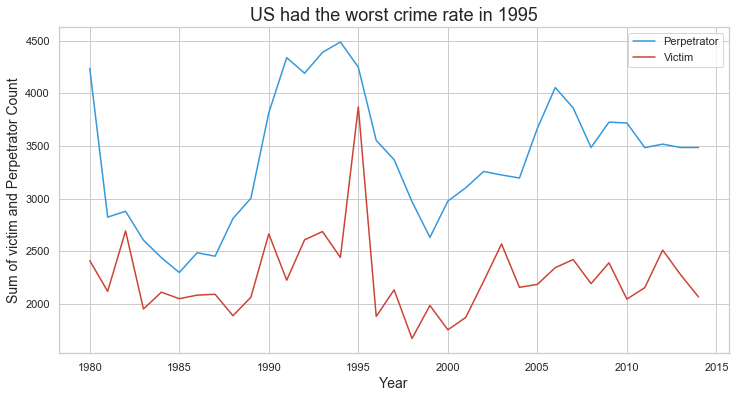

In [1579]:
plt.figure(figsize=(12,6))
plt.plot(vp.Year,vp.Perpetrator_Count,color='#3498DB',label='Perpetrator')
plt.plot(vp.Year,vp.Victim_Count,color='#CB4335',label='Victim')
#plt.plot(vp.year,vp['Incident'],color='green',label='Incident')
plt.title('US had the worst crime rate in 1995',size=18)
plt.legend()
plt.xlabel('Year',size=14)
plt.ylabel('Sum of victim and Perpetrator Count',size=14)
plt.show() 


In [1581]:
df3 = df.groupby(by=['Year']).mean().reset_index()  



#df2 = df.groupby(by=['Year'])['Victim_Count','Perpetrator_Count'].sum().reset_index() 

In [1582]:
df.head(3)

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI


In [1583]:
df3.head(3)

,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
0,1980,14.628919,35.351637,21.835571,0.104365,0.183483
1,1981,13.613872,36.056300,22.973595,0.099868,0.133110
2,1982,12.496544,35.670415,22.525701,0.131036,0.140138


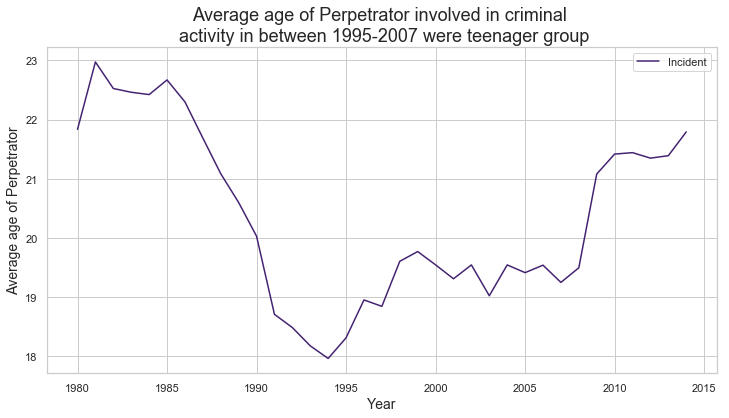

In [1589]:
plt.figure(figsize=(12,6))
# plt.plot(vp.Year,vp['Perpetrator Count'],color='#3498DB',label='Perpetrator')
# plt.plot(vp.Year,vp['Victim Count'],color='#CB4335',label='Victim')
plt.plot(df3.Year,df3.Perpetrator_Age,color='#432371',label='Incident')  
plt.title('Average age of Perpetrator involved in criminal \n activity in between 1995-2007 were teenager group',size=18)
plt.legend()
plt.xlabel('Year',size=14)
plt.ylabel('Average age of Perpetrator',size=14)
plt.show() 

So many teenager involved in criminal activity 


In [1590]:
df.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


TypeError: unsupported operand type(s) for /: 'str' and 'int'

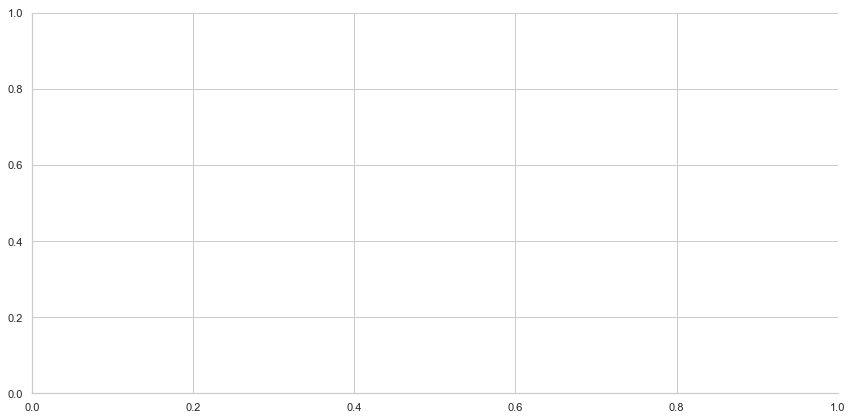

In [1557]:

sns.set(style='whitegrid')
sns.catplot(x='Victim_Race',
            #y='Incident',
            kind='bar',
            height=6, # makes the height 6 units high
            aspect=2, # height should be 2 times width
            data=df,
            hue='Victim_Sex',
            legend=False, # remove default legend
           palette=['#432371',"#FAAE7B",'red'])
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Number of Incidents',size=14)
plt.title('On average black inidividual of unknown race experience \n the highest incident of crime ',size=18)
plt.legend(loc='upper left')
plt.show() 

In [ ]:
%pip install geopandas   


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [ ]:
# Map visualization 

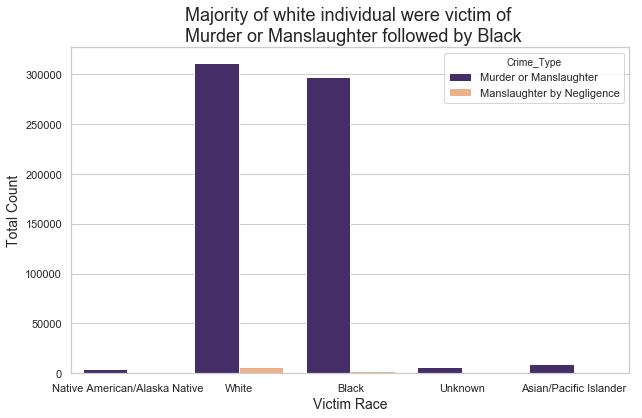

In [1591]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='Victim_Race',
              #y='Crime Type',
              hue='Crime_Type',
              palette=['#432371',"#FAAE7B"] 
             )
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Count',size=14)
plt.title('Majority of white individual were victim of \n Murder or Manslaughter followed by Black',size=18)
plt.show() 


In [1592]:
ct5 = pd.crosstab(df['Agency_Type'],
                  df['Crime_Type'],)  

In [1593]:
ct5 

Crime_Type,Manslaughter by Negligence,Murder or Manslaughter
Agency_Type,,
County Police,382,22311
Municipal Police,5819,487207
Regional Police,11,224
Sheriff,2475,102847
Special Police,73,2816
State Police,352,13883
Tribal Police,4,50


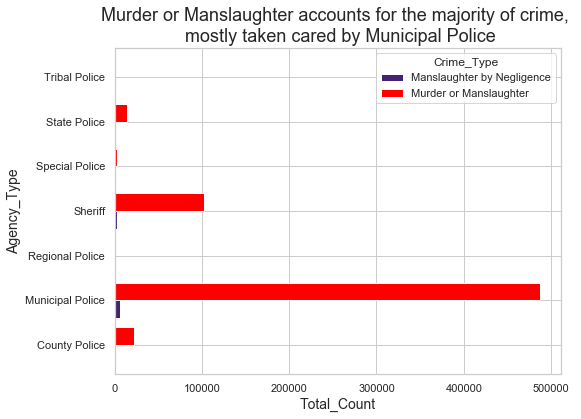

In [1594]:

ct5.plot(kind='barh', 
         #stacked=True, 
         color=['#432371','red'],
         width=0.8,  
         figsize=(8,6) # (x-axis,y-axis)
         )
plt.xlabel('Total_Count',size=14)
plt.ylabel('Agency_Type',size=14)
plt.title('Murder or Manslaughter accounts for the majority of crime, \n mostly taken cared by Municipal Police',size=18)
plt.show() 

In [ ]:
# which race is associated with carryiyng out higher number of crime? 

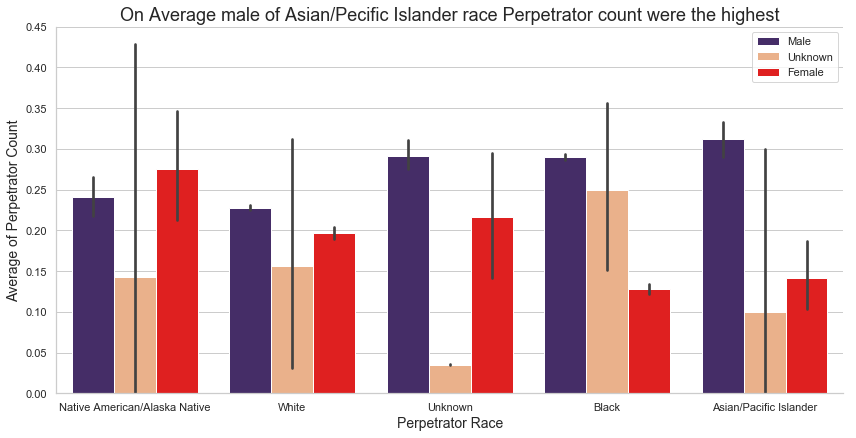

In [1600]:
sns.catplot(x='Perpetrator_Race',
           y='Perpetrator_Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator_Sex', 
            palette=['#432371',"#FAAE7B",'red'],
            legend=False,
           data=df)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Average of Perpetrator Count',size=14)
plt.title('On Average male of Asian/Pecific Islander race Perpetrator count were the highest',size=18)
plt.legend() 
plt.show() 


In [ ]:
# Lets group by race see which race are responsible for higher number of victim count

In [1601]:
Perpetrator_Count_greater_than_zero = df[df['Perpetrator_Count'] > 0 ] 

In [1602]:
Perpetrator_Count_greater_than_zero.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Unknown,Male,40.0,Unknown,Unknown,Unknown,Firearm,0,1,FBI
10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,Male,36,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
17,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,Yes,Male,33,Native American/Alaska Native,Unknown,Male,23.0,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
54,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,Yes,Male,33,Black,Not Hispanic,Male,26.0,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI


In [1604]:
gp_prace = Perpetrator_Count_greater_than_zero.groupby(by='Perpetrator_Race').sum ().reset_index()      

In [1605]:
gp_prace 

,Perpetrator_Race,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
0,Asian/Pacific Islander,2039041,12280,28983,23028.0,369,1787
1,Black,75721313,982465,1206264,780367.0,6104,58199
2,Native American/Alaska Native,1108594,3386,19233,13954.0,64,886
3,Unknown,14494773,128286,267227,16349.0,3231,8360
4,White,65623469,672997,1110248,808737.0,7279,49025


In [ ]:
# gp_prace = gp_prace.sort_values(['Perpetrator Count']).reset_index(drop=True)
# sns.catplot(x='Perpetrator Race',
#             y= 'Perpetrator Count',
#            data=gp_prace,
#             height=6,
#             aspect=2,
#             order=["Black", "White",'Unknown','Asian/Pacific Islander','Native American/Alaska Native'],
#             palette=['#432371',"#FAAE7B",'red','#3498DB','#F4D03F'],  
#              #markers=["^", "o"], 
#             #linestyles=["-", "--"],
#             #hue='Perpetrator Race', 
#            kind='bar') 
# plt.xlabel('Perpetrator Race',size=14)
# plt.ylabel('Total Count Of Perpetrator',size=14)
# plt.title('Sum total of black Perpetrator were highest among other reace..',size=18) 




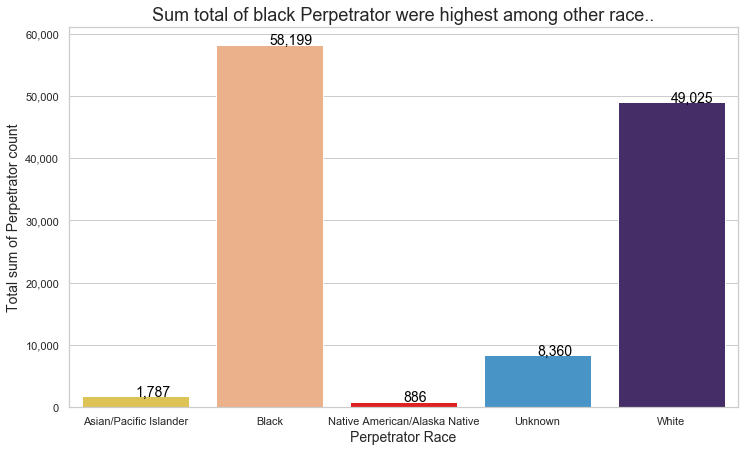

In [1609]:
plt.figure(figsize=(12,7))   
# plot barh chart with Perpetrator_Race as x values
ax = sns.barplot(gp_prace.Perpetrator_Race,  
                 gp_prace['Perpetrator_Count'],
                 palette=['#F4D03F',"#FAAE7B",'red','#3498DB','#432371'])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
for i, v in enumerate(gp_prace["Perpetrator_Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black',size=14)  
plt.title('Sum total of black Perpetrator were highest among other race..',size=18)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Total sum of Perpetrator count',size=14)  
plt.show()


### EDA
_Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships_.

In [1416]:
# All the int features 
df_int_imputed.head() 

,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
0,1980,1,14,15,0,0
1,1980,1,43,42,0,0
2,1980,2,30,0,0,0
3,1980,1,43,42,0,0
4,1980,2,30,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c58374ba8>,
      dtype=object)

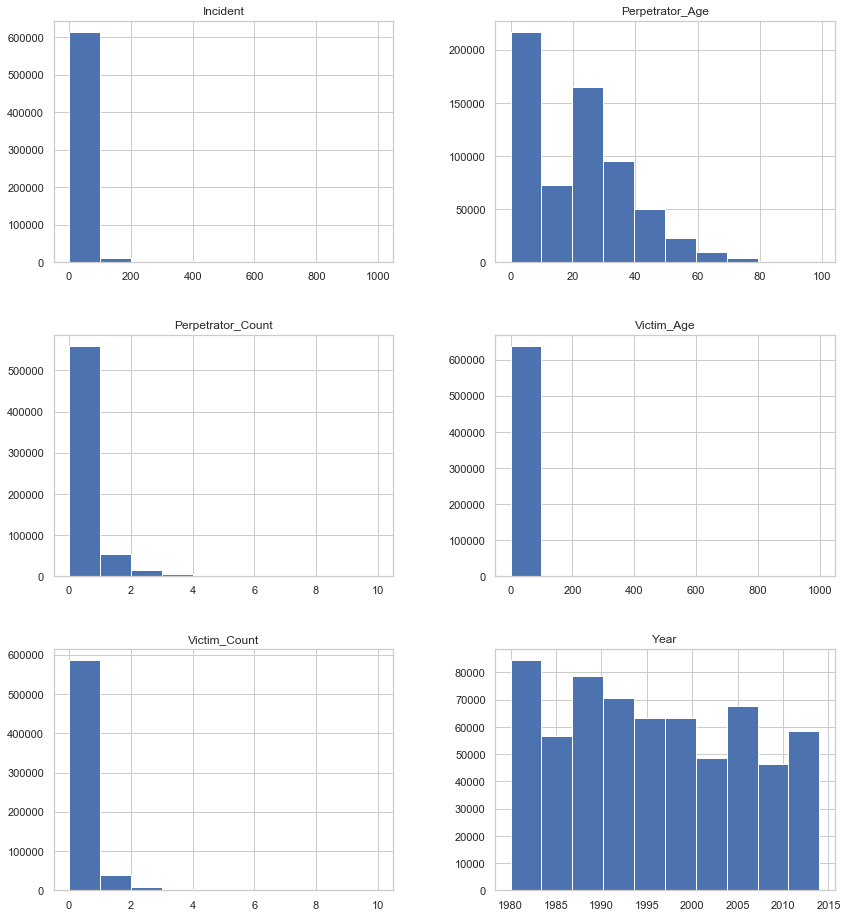

In [1359]:
# histogram of all int features 
df_int_imputed.hist(bins=10,figsize=(14,16),layout=(3,2)) 

Above histogram shows how our quantitative features are distributed. There some strange about victim age. 
And it is because some of the victim age are greater than 98 year which does not make much sense. Therefore we are going to ignore all the instance that have victim age > 98. 

The Perpetrator age 0 which also doesn't quit make sense. Age 0 could be a missing value. There will group the 
perpetrator age into different group: 0-20,20-30,30-45,45 over.

In [1459]:
df_imputed.head() 

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Text(0.5, 1.0, 'Perpetrator of age between 20-40 reponsible for \n majority of incident.')

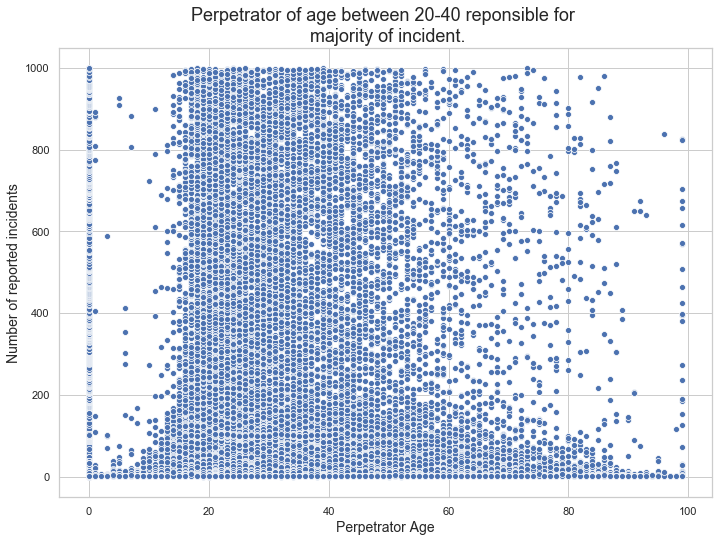

In [1427]:
#Incidnt is as one or more offenses committed by the same offender, or group of offenders 
#acting in concert, at the same time and place.
sns.scatterplot(df_imputed.Perpetrator_Age,
           df_imputed.Incident)
plt.xlabel('Perpetrator Age',size=14) 
plt.ylabel('Number of reported incidents',size=14)
plt.title('Perpetrator of age between 20-40 reponsible for \n majority of incident.',size=18)

There seems to be some kind of correlation between number of incident and age of perpetrator. Perpetrator between 20-40 are mostly involved in higher incident. One interesting thing here is the perpetrator age 0 also seems to suggest high incident which is most likely inaccurate because it makes no sense that there are criminal of age 0.  

In [1517]:
df_filtered=df_imputed[df_imputed.Victim_Age < 99]  


In [1518]:
df_filtered.head(20) 


,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0,0,FBI
8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,Male,32,White,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,Male,38,White,Unknown,Male,40.0,Unknown,Unknown,Unknown,Firearm,0,1,FBI
10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,Male,36,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [1519]:
# calculate the median age of Perpetrator_Age
df_filtered.Perpetrator_Age.median() 

21.0

In [1525]:
# Replace all Perpetrator_Age 0 with NaN to later replace with Median value 
df_filtered.loc[df_filtered.Perpetrator_Age==0.0,'Perpetrator_Age']=np.nan # all the 0 age converted to NaN
#Code from : https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values/45387111

In [1526]:
# Replace all Perpetrator_Age NaN values with Median Perpetrator_Age.
df_filtered.fillna(21,inplace=True)

/Users/ghimirek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [1524]:
# Display the result of replaced Perpetrator_Age with NaN 
df_filtered.head()  

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [1539]:
# Display the result of replaced NaN Perpetrator_Age with Median age
df_filtered.tail()  

,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
638449,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,21.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,White,Not Hispanic,Female,24.0,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [1538]:
df_filtered.describe() 

,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
count,628199.000000,628199.000000,628199.000000,628199.000000,628199.000000,628199.000000
mean,1995.821870,23.159537,32.595428,27.483751,0.122972,0.186099
std,9.935352,92.825153,16.032935,11.411970,0.537181,0.587056
min,1980.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1988.000000,1.000000,22.000000,21.000000,0.000000,0.000000
50%,1995.000000,2.000000,29.000000,21.000000,0.000000,0.000000
75%,2004.000000,10.000000,41.000000,32.000000,0.000000,0.000000
max,2014.000000,999.000000,98.000000,99.000000,10.000000,10.000000


In [1540]:
df_filtered['Perpetrator_age_range'] = pd.cut(df_filtered.Perpetrator_Age,[0,20,30,45,1e6],3,
                                           labels=['Age(0-20)','Age(21-30)','Age(31-45)','Age 45+'])

/Users/ghimirek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1541]:
df_filtered.head() 


,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source,Perpetrator_age_range
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,Age(0-20)
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Age(31-45)
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,21.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,Age(21-30)
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI,Age(31-45)
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,21.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,Age(21-30)


In [1656]:
prange_gp=df_filtered.groupby(by=['Perpetrator_age_range','Perpetrator_Sex']).count() 

In [1676]:
ct_Perpetrator_age_range = pd.crosstab(df_filtered.Perpetrator_age_range,
           df_filtered.Perpetrator_Sex,
           
           normalize=True).round(4)*100

In [1677]:
ct_Perpetrator_age_range 

Perpetrator_Sex,Female,Male,Unknown
Perpetrator_age_range,,,
Age(0-20),1.09,13.83,0.02
Age(21-30),2.85,26.00,29.38
Age(31-45),2.58,15.66,0.01
Age 45+,1.10,7.45,0.03


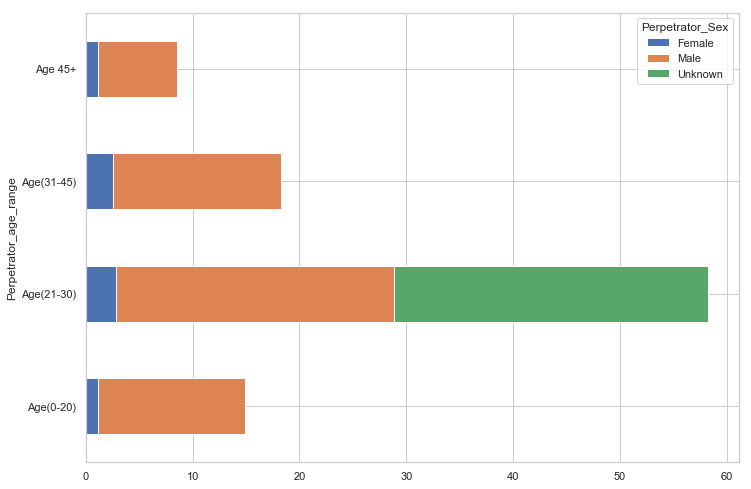

In [1678]:
ct_Perpetrator_age_range.plot(kind='barh',
                             stacked=True,
                             )

In [ ]:
survival_rate.plot(kind='barh', 
                  stacked=True,
                   colors=['red','green']
                  )


In [1679]:
pd.crosstab(df_filtered.Perpetrator_age_range,
           df_filtered.Perpetrator_Sex,
     
           )

Perpetrator_Sex,Female,Male,Unknown
Perpetrator_age_range,,,
Age(0-20),6858,86869,138
Age(21-30),17907,163348,184546
Age(31-45),16179,98351,87
Age 45+,6929,46827,160


In [1552]:
prange_gp

Agency_Code  Agency_Name  Agency_Type  \
Perpetrator_age_range Perpetrator_Sex                                          
Age(0-20)             Female                  6858         6858         6858   
                      Male                   86869        86869        86869   
                      Unknown                  138          138          138   
Age(21-30)            Female                 17907        17907        17907   
                      Male                  163348       163348       163348   
                      Unknown               184546       184546       184546   
Age(31-45)            Female                 16179        16179        16179   
                      Male                   98351        98351        98351   
                      Unknown                   87           87           87   
Age 45+               Female                  6929         6929         6929   
                      Male                   46827        46827        46827   
                      Unknown                  160          160          160   

                                         City   State    Year   Month  \
Perpetrator_age_range Perpetrator_Sex                                   
Age(0-20)             Female             6858    6858    6858    6858   
                      Male              86869   86869   86869   86869   
                      Unknown             138     138     138     138   
Age(21-30)            Female            17907   17907   17907   17907   
                      Male             163348  163348  163348  163348   
                      Unknown          184546  184546  184546  184546   
Age(31-45)            Female            16179   16179   16179   16179   
                      Male              98351   98351   98351   98351   
                      Unknown              87      87      87      87   
Age 45+               Female             6929    6929    6929    6929   
                      Male              46827   46827   46827   46827   
                      Unknown             160     160     160     160   

                                       Incident  Crime_Type  Crime_Solved  \
Perpetrator_age_range Perpetrator_Sex                                       
Age(0-20)             Female               6858        6858          6858   
                      Male                86869       86869         86869   
                      Unknown               138         138           138   
Age(21-30)            Female              17907       17907         17907   
                      Male               163348      163348        163348   
                      Unknown            184546      184546        184546   
Age(31-45)            Female              16179       16179         16179   
                      Male                98351       98351         98351   
                      Unknown                87          87            87   
Age 45+               Female               6929        6929          6929   
                      Male                46827       46827         46827   
                      Unknown               160         160           160   

                                       Victim_Sex  Victim_Age  Victim_Race  \
Perpetrator_age_range Perpetrator_Sex                                        
Age(0-20)             Female                 6858        6858         6858   
                      Male                  86869       86869        86869   
                      Unknown                 138         138          138   
Age(21-30)            Female                17907       17907        17907   
                      Male                 163348      163348       163348   
                      Unknown              184546      184546       184546   
Age(31-45)            Female                16179       16179        16179   
                      Male                  98351       98351        98351   
                      Unknown       

Text(0.5, 1.0, 'Perpetrator of age range 21-30 were repsponsible for majority of crime')

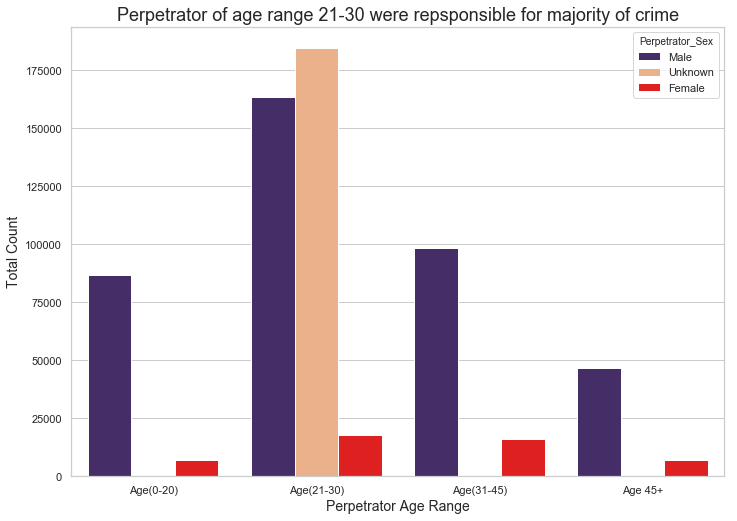

In [1612]:
sns.countplot(x= 'Perpetrator_age_range',
              hue='Perpetrator_Sex', 
              palette=['#432371',"#FAAE7B",'red'],
             data=df_filtered)
plt.xlabel('Perpetrator Age Range',size=14)
plt.ylabel('Total Count',size=14)
plt.title('Perpetrator of age range 21-30 were repsponsible for majority of crime',size=18) 

<Figure size 864x720 with 0 Axes>

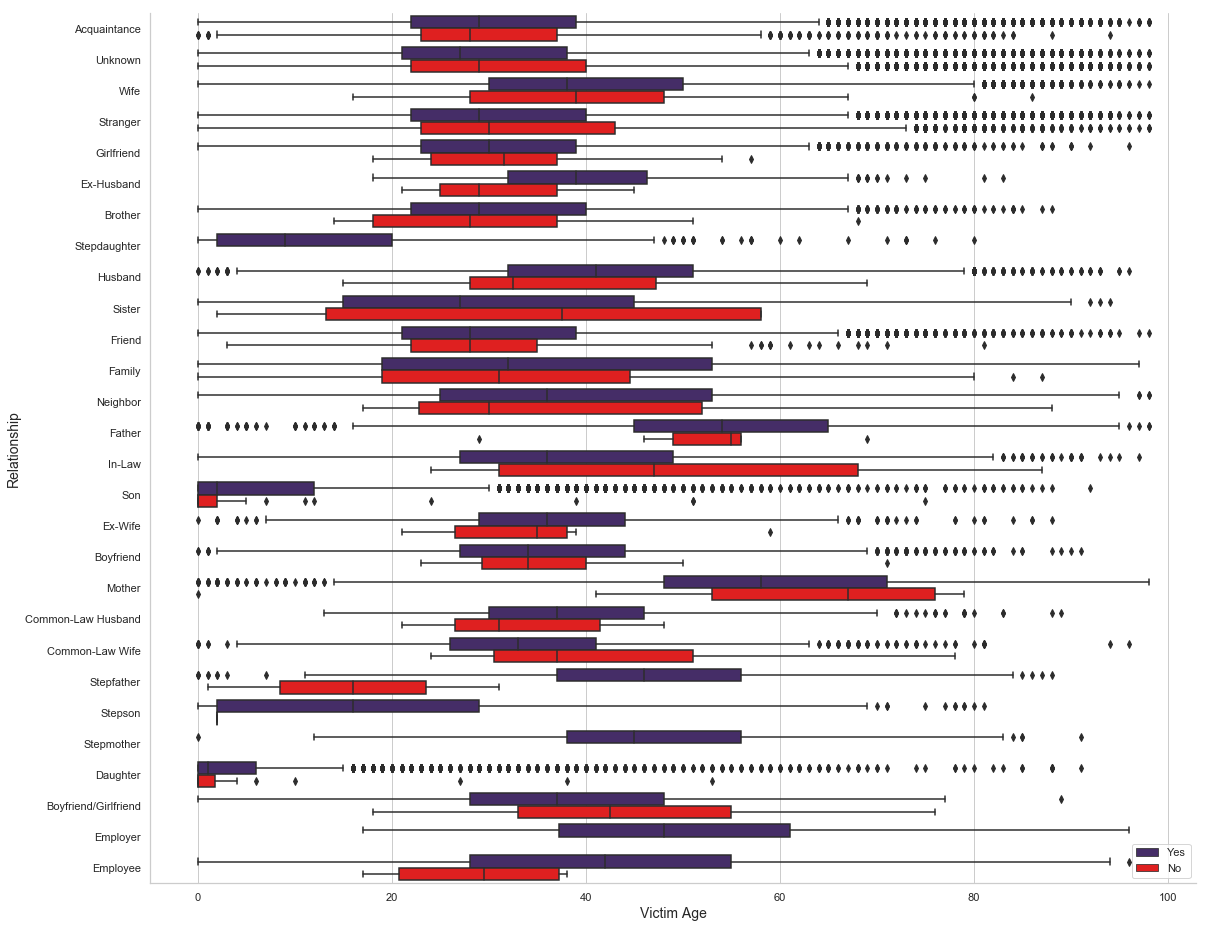

In [1655]:
plt.figure(figsize=(12,10))
sns.catplot(y='Relationship',
            x ='Victim_Age',
            hue='Crime_Solved',
            palette=['#432371',"red"], 
            kind='box',
            orient='h',  
            height=13,
            aspect=1.3,
            legend=False,
            data= df_filtered  
           )
plt.xlabel('Victim Age',size=14)
plt.ylabel('Relationship',size=14) 
plt.legend()


Text(0.5, 1.0, 'Relation between Perpetrator and victim age')

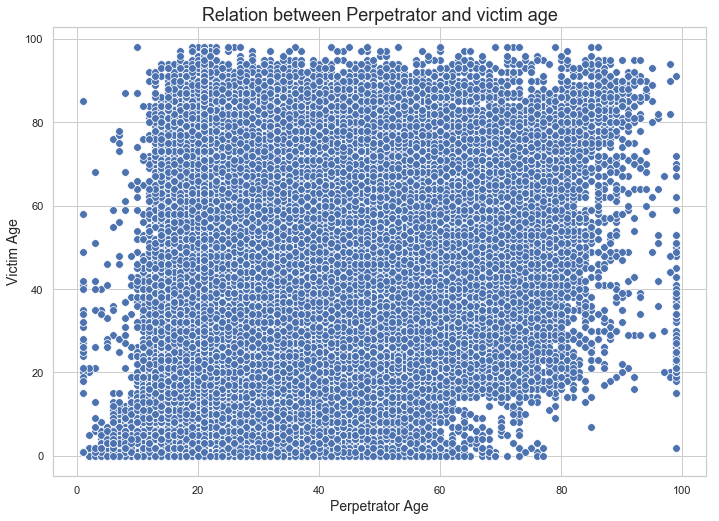

In [1551]:
# Scatter plot between victim and perpetrator age 
sns.scatterplot(df_filtered.Perpetrator_Age,
                df_filtered.Victim_Age,
                s=60, # size of the dots 
                )
plt.xlabel('Perpetrator Age',size=14)
plt.ylabel('Victim Age',size=14)
plt.title('Relation between Perpetrator and victim age',size=18) 

We see that there is some sort of linear positive relation between victim and perpetrator age with most of the cluster around 20-60 age for both. We will further confirm the above relation with correlation heatmap. 

In [1317]:
# Check to see which race of population who are victim of crime based on race.
crosstab_vict_race_sex = pd.crosstab(df_cat_featuress.Victim_Race,
                         df_cat_featuress.Victim_Sex,
                        margins=True,
                        margins_name='Total',
                        normalize='columns').round(3)*100   

In [1319]:
ct_vict_race_sex

Victim Sex,Female,Male,Unknown,Total
Victim Race,,,,
Asian/Pacific Islander,2.1,1.4,0.2,1.5
Black,36.3,50.1,4.2,47.0
Native American/Alaska Native,0.8,0.7,0.1,0.7
Unknown,0.9,0.9,89.9,1.0
White,59.8,46.9,5.6,49.7


As you can see from the table above that, majority of people who were victim of crime were of white race,<font color='red'> 50%</font>.
Another interesting thing from this is that white female were the highest victim of crime among all the 
women of different race, <font color='red'>59.8%</font>. 

In [1321]:
crsstab_crimeTp_wepn = pd.crosstab(df_cat_featuress.Weapon,
                              df_cat_featuress.Crime_Type,
                 margins=True,
                  margins_name='Total',
                 normalize=True, 
                 ).round(3)*100 

In [1322]:
crsstab_crimeTp_wepn

Crime_Type,Manslaughter by Negligence,Murder or Manslaughter,Total
Weapon,,,
Blunt Object,0.1,10.4,10.5
Drowning,0.0,0.2,0.2
Drugs,0.0,0.2,0.2
Explosives,0.0,0.1,0.1
Fall,0.0,0.0,0.0
Fire,0.0,0.9,1.0
Firearm,0.1,7.3,7.4
Gun,0.0,0.3,0.3
Handgun,0.6,49.2,49.7


<font color='red'>98.6%</font> of crime were <b>Murder or Manslaughter</b> with almost <font color='red'>50%</font> of them committed using Handgun.


In [1066]:



# South = 'Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 
# 'South Carolina', 'Tennessee', 'Georgia', 
#     'Florida', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma'


# NorthEast = 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
#         'New York', 'New Jersey', 'Pennsylvania'



# West=   'Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 
#         'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii'

# MidWest = 'Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota',
#           'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'.
    
    


In [1067]:
df[df['Victim Age'] < 99 ].shape 

(628199, 23)

In [1071]:
(df['Victim Age']>900).count()  

638454

In [1070]:
df.count()  

Agency Code              638454
Agency Name              638454
Agency Type              638454
City                     638454
State                    638454
Year                     638454
Month                    638454
Incident                 638454
Crime Type               638454
Crime Solved             638454
Victim Sex               638454
Victim Age               638454
Victim Race              638454
Victim Ethnicity         638454
Perpetrator Sex          638454
Perpetrator Age          638453
Perpetrator Race         638454
Perpetrator Ethnicity    638454
Relationship             638454
Weapon                   638454
Victim Count             638454
Perpetrator Count        638454
Record Source            638454
dtype: int64

In [1049]:
state_gp = df.groupby(by=['Month','Crime Type'])['Incident'].mean().reset_index() 

In [1052]:
state_gp.head() 

,Month,Crime Type,Incident
0,April,Manslaughter by Negligence,76.678962
1,April,Murder or Manslaughter,21.840561
2,August,Manslaughter by Negligence,63.213630
3,August,Murder or Manslaughter,23.080389
4,December,Manslaughter by Negligence,58.290196


In [1014]:
#(state_gp['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [1022]:
#sn1 = set(state_gp['State'].unique())

In [1038]:
#state_names = ["Alabama","Alaska","Arizona","Arkansas","California",
               "Colorado","Connecticut","Delaware",
               "Florida","Georgia","Hawaii","Idaho","Illinois","Indiana",
  "Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi",
    "Missouri","Montana","Nebraska","Nevada","New Hampshire",
    "New Jersey","New Mexico","New York","North Carolina",
    "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee",
"Texas","Utah","Vermont","Virginia","Washington",
    "West Virginia","Wisconsin","Wyoming"] 

In [1126]:
ct_sex=pd.crosstab(df.Victim_Sex,df.Perpetrator_Sex,
                   margins=True)

In [1127]:
ct_sex

Perpetrator_Sex,Female,Male,Unknown,All
Victim_Sex,,,,
Female,10869,99381,33095,143345
Male,37629,299879,156617,494125
Unknown,50,281,653,984
All,48548,399541,190365,638454


# Discoveries
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# Exceptional Work